In [40]:
# Install the required packages
%pip install pandas numpy matplotlib 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

You should consider upgrading via the '/Applications/VSCode/MLProjs/refBias/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [41]:
df = pd.read_csv('data/PremierLeague.csv')
df = df.drop(labels=[
    'Time', 'HomeTeamCorners', 'AwayTeamCorners', 'HalfTimeHomeTeamGoals', 'HalfTimeAwayTeamGoals', 'HalfTimeResult', 'HomeTeamShots', 'AwayTeamShots', 'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget', 'B365HomeTeam', 'B365AwayTeam', 'B365Draw', 'B365Over2.5Goals', 'B365Under2.5Goals', 'MarketMaxHomeTeam', 'MarketMaxDraw', 'MarketMaxAwayTeam', 'MarketAvgHomeTeam', 'MarketAvgDraw', 'MarketAvgAwayTeam', 'MarketMaxOver2.5Goals', 'MarketMaxUnder2.5Goals', 'MarketAvgOver2.5Goals', 'MarketAvgUnder2.5Goals', 'HomeTeamPoints', 'AwayTeamPoints'
    ],
    axis = 1,
    )
df = df.dropna()

In [42]:
top_100_referees = df['Referee'].value_counts().head(30)
print("Top 30 referees based on the number of matches officiated:")
print(top_100_referees)

Top 30 referees based on the number of matches officiated:
Referee
M Dean           529
M Atkinson       460
A Marriner       392
M Oliver         383
A Taylor         380
P Dowd           301
H Webb           297
M Clattenburg    293
L Mason          287
J Moss           274
K Friend         272
C Foy            257
C Pawson         252
M Halsey         228
A Wiley          207
S Bennett        205
S Attwell        205
M Jones          202
P Tierney        183
L Probert        182
R Styles         176
M Riley          169
P Walton         169
C Kavanagh       145
G Poll           139
N Swarbrick      132
D Coote          111
S Hooper         107
G Scott          105
U Rennie         100
Name: count, dtype: int64


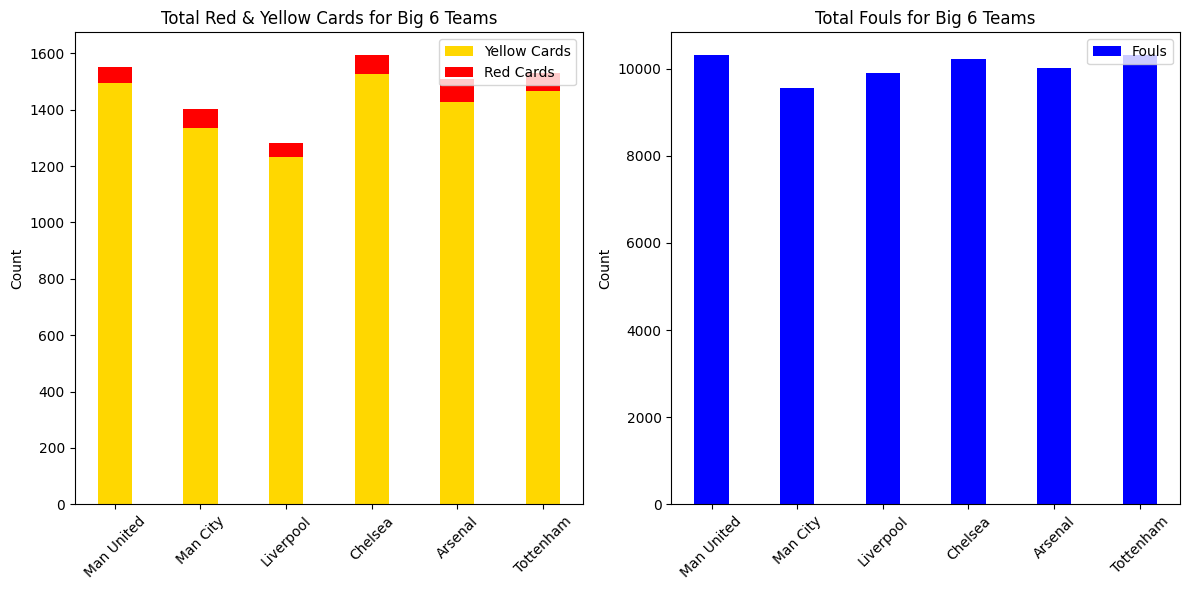

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the big 6 teams
big_six = ["Man United", "Man City", "Liverpool", "Chelsea", "Arsenal", "Tottenham"]

def plot_big_six_cards_and_fouls(df):
    # Initialize dictionary to store card counts and fouls
    card_foul_counts = {team: {"Yellow Cards": 0, "Red Cards": 0, "Fouls": 0} for team in big_six}

    # Aggregate red cards, yellow cards, and fouls for each team
    for team in big_six:
        card_foul_counts[team]["Yellow Cards"] = df.loc[df["HomeTeam"] == team, "HomeTeamYellowCards"].sum() + \
                                                 df.loc[df["AwayTeam"] == team, "AwayTeamYellowCards"].sum()
        card_foul_counts[team]["Red Cards"] = df.loc[df["HomeTeam"] == team, "HomeTeamRedCards"].sum() + \
                                              df.loc[df["AwayTeam"] == team, "AwayTeamRedCards"].sum()
        card_foul_counts[team]["Fouls"] = df.loc[df["HomeTeam"] == team, "HomeTeamFouls"].sum() + \
                                          df.loc[df["AwayTeam"] == team, "AwayTeamFouls"].sum()

    # Convert to DataFrame
    card_foul_df = pd.DataFrame(card_foul_counts).T  # Transpose for better plotting

    # Define bar width and positions
    bar_width = 0.4
    x = np.arange(len(big_six))  # X-axis positions for teams

    # Create figure with two subplots: one for cards and one for fouls
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot stacked bars for yellow and red cards on the first subplot
    axes[0].bar(x, card_foul_df["Yellow Cards"], width=bar_width, color='gold', label="Yellow Cards")
    axes[0].bar(x, card_foul_df["Red Cards"], width=bar_width, bottom=card_foul_df["Yellow Cards"], color='red', label="Red Cards")

    # Plot separate bars for fouls on the second subplot
    axes[1].bar(x, card_foul_df["Fouls"], width=bar_width, color='blue', label="Fouls")

    # Formatting both plots
    axes[0].set_title("Total Red & Yellow Cards for Big 6 Teams")
    axes[0].set_ylabel("Count")
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(big_six, rotation=45)
    axes[0].legend()

    axes[1].set_title("Total Fouls for Big 6 Teams")
    axes[1].set_ylabel("Count")
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(big_six, rotation=45)
    axes[1].legend()

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Example usage:
plot_big_six_cards_and_fouls(df)

In [44]:
def get_referee_fouls(referee_name, team_name):
    referee_matches = df[df['Referee'] == referee_name]
    
    home_matches = referee_matches[referee_matches['HomeTeam'] == team_name]
    home_fouls = home_matches['HomeTeamFouls'].sum()

    away_matches = referee_matches[referee_matches['AwayTeam'] == team_name]
    away_fouls = away_matches['AwayTeamFouls'].sum()

    total_matches = len(home_matches) + len(away_matches)
    total_fouls = home_fouls + away_fouls

    return {
        'Total Fouls': total_fouls,
        'Matches Officiated': total_matches,
        'Fouls per Match': total_fouls/total_matches if total_matches > 0 else 0
    }
    
referee = "M Dean"  # Example referee
team = "Arsenal"      # Example team
stats = get_referee_fouls(referee, team)
print(f"Fouls given by {referee} to {team}:")
for key, value in stats.items():
    print(f"{key}: {value:.2f}")

Fouls given by M Dean to Arsenal:
Total Fouls: 652.00
Matches Officiated: 62.00
Fouls per Match: 10.52


In [45]:
def get_referee_cards(referee_name, team_name):
    # Get matches where the referee officiated
    referee_matches = df[df['Referee'] == referee_name]
    
    # Get cards when team was home
    home_matches = referee_matches[referee_matches['HomeTeam'] == team_name]
    home_cards = home_matches['HomeTeamYellowCards'].sum() + home_matches['HomeTeamRedCards'].sum()
    
    # Get cards when team was away
    away_matches = referee_matches[referee_matches['AwayTeam'] == team_name]
    away_cards = away_matches['AwayTeamYellowCards'].sum() + away_matches['AwayTeamRedCards'].sum()
    
    total_matches = len(home_matches) + len(away_matches)
    total_cards = home_cards + away_cards
    
    return {
        'Total Cards': total_cards,
        'Matches Officiated': total_matches,
        'Cards per Match': total_cards/total_matches if total_matches > 0 else 0
    }

# Example usage - replace with your desired referee/team
referee = "U Rennie"  # Example referee
team = "Arsenal"      # Example team
stats = get_referee_cards(referee, team)
print(f"Cards given by {referee} to {team}:")
for key, value in stats.items():
    print(f"{key}: {value:.2f}")

Cards given by U Rennie to Arsenal:
Total Cards: 10.00
Matches Officiated: 9.00
Cards per Match: 1.11
